In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/balanced_fights.csv')

sns.set_style(style="whitegrid")

Duration of fights (in seconds):
count    17024.000000
mean       635.215930
std        363.339772
min          5.000000
25%        280.000000
50%        812.000000
75%        900.000000
max       1500.000000
Name: total_time_seconds, dtype: float64


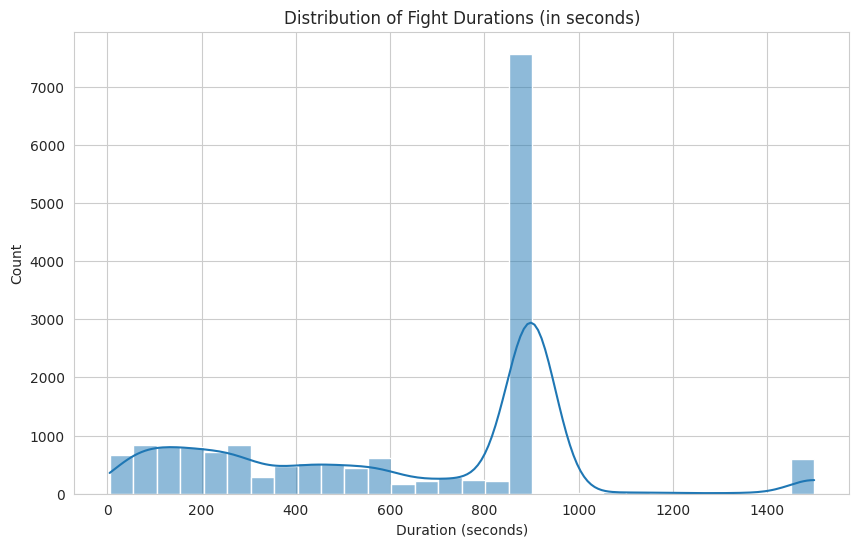

In [36]:
if 'total_time_seconds' in df.columns:
    print("Duration of fights (in seconds):")
    print(df['total_time_seconds'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_time_seconds'], bins=30, kde=True)
    plt.title('Distribution of Fight Durations (in seconds)')
    plt.xlabel('Duration (seconds)')
    plt.show()
else:
    print("Column 'total_time_seconds' not found in the dataset.")

In [37]:
zero_strikes_fights = df[
    (df['f1_tot_str_attempted'] == 0) &
    (df['f2_tot_str_attempted'] == 0)
]

print(f"Number of fights with zero strikes attempted: {len(zero_strikes_fights)}")
if len(zero_strikes_fights) > 0:
    print("\nExample of a fight with zero strikes attempted:")
    cols_to_show = ['event_date', 'f1_name', 'f2_name', 'method_detail', 'f1_tot_str_attempted']
    display(zero_strikes_fights[cols_to_show].head())

Number of fights with zero strikes attempted: 6

Example of a fight with zero strikes attempted:


,event_date,f1_name,f2_name,method_detail,f1_tot_str_attempted
2324,1994-03-11,Royce Gracie,Jason DeLucia,Armbar From Mount,0
2514,1994-03-11,Royce Gracie,Remco Pardoel,Gi Choke From Back Control,0
6684,1995-07-14,Oleg Taktarov,Anthony Macias,Guillotine Choke After Drop to Ground,0
8695,1994-03-11,Royce Gracie,Jason DeLucia,Armbar From Mount,0
8897,1995-07-14,Oleg Taktarov,Anthony Macias,Guillotine Choke After Drop to Ground,0


Methods distribution (Top 10 %):
method_detail
Punch to Head At Distance            8.722446
Rear Naked Choke                     7.383266
Punches to Head At Distance          4.349372
Punches to Head On Ground            3.010192
Punch to Head In Clinch              1.528798
Kick to Head At Distance             1.362882
Punches to Head From Mount           1.351031
Punches to Head From Back Control    1.196966
Guillotine Choke On Ground           0.805878
Triangle Choke From Bottom Guard     0.782176
Name: proportion, dtype: float64


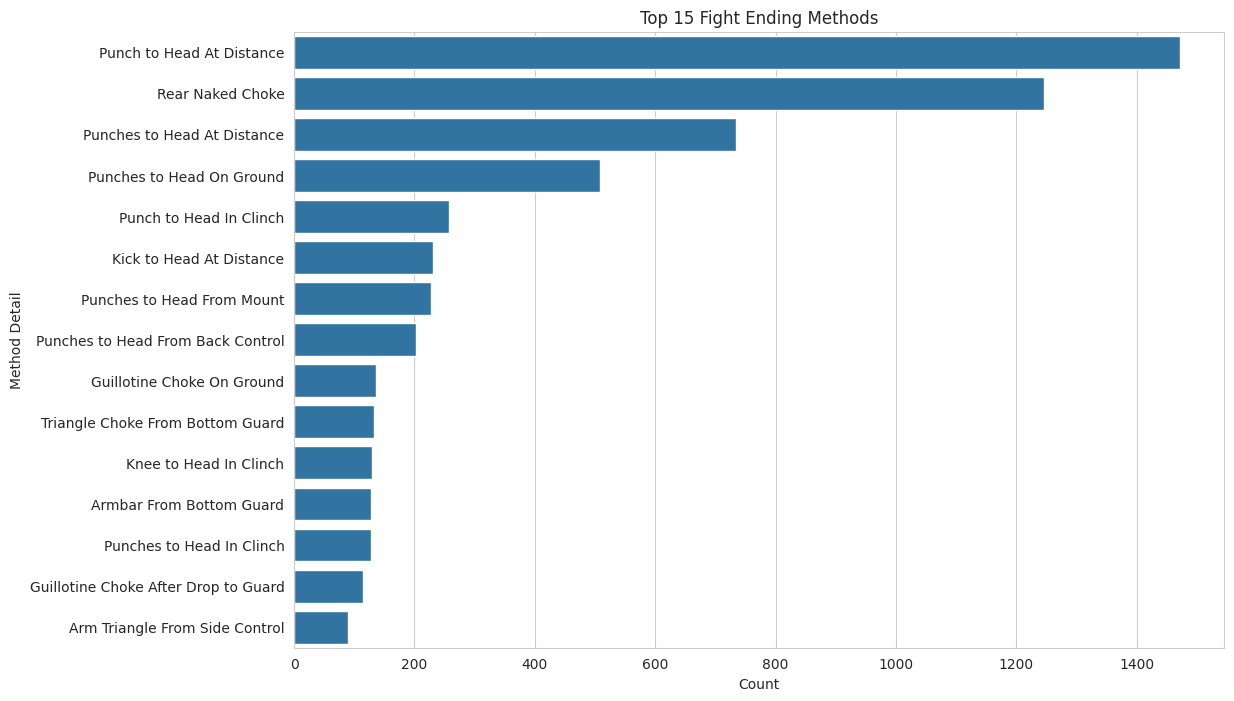

In [38]:
if 'method_detail' in df.columns:
    method_counts = df['method_detail'].value_counts(normalize=True) * 100
    print("Methods distribution (Top 10 %):")
    print(method_counts.head(10))

    plt.figure(figsize=(12, 8))
    
    top_methods = df['method_detail'].value_counts().iloc[:15].index
    
    sns.countplot(y='method_detail', data=df, order=top_methods)
    plt.title('Top 15 Fight Ending Methods')
    plt.xlabel('Count')
    plt.ylabel('Method Detail')
    plt.show()
else:
    print("Column 'method_detail' not found.")

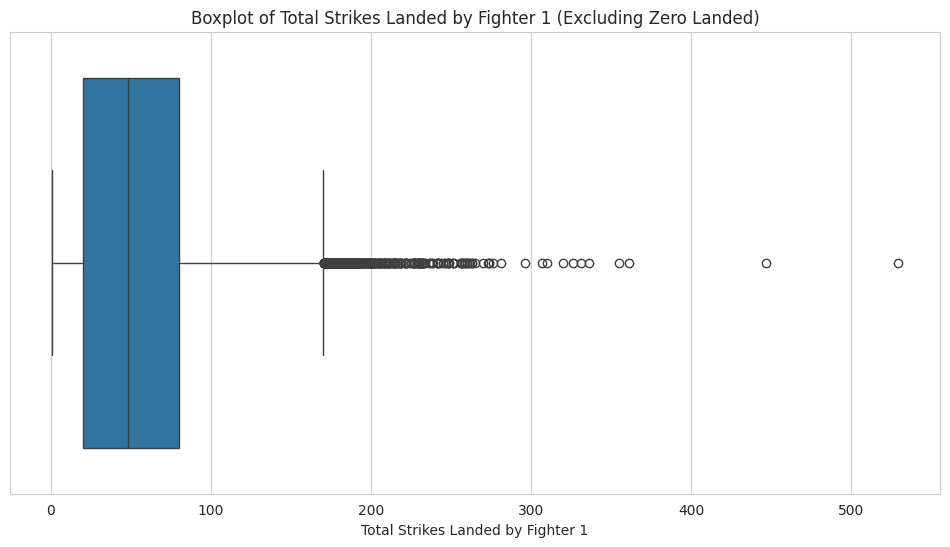

In [39]:
df_filtered = df[df['f1_tot_str_landed'] > 0]

plt.figure(figsize=(12, 6))

sns.boxplot(x=df_filtered['f1_tot_str_landed'])

plt.title('Boxplot of Total Strikes Landed by Fighter 1 (Excluding Zero Landed)')
plt.xlabel('Total Strikes Landed by Fighter 1')
plt.show()